In [7]:
# 欠損値の確認
def check_null(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        null_table = pd.concat([null_val, percent], axis=1)
        null_table = null_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return null_table
 

In [79]:
import pandas as pd
import numpy as np
 
data = pd.read_csv("titanic/data.csv")

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- PassengerId – 乗客識別ユニークID
- Survived – 生存フラグ（0=死亡、1=生存）
- Pclass – チケットクラス
- Name – 乗客の名前
- Sex – 性別（male=男性、female＝女性）
- Age – 年齢
- SibSp – タイタニックに同乗している兄弟/配偶者の数
- parch – タイタニックに同乗している親/子供の数
- ticket – チケット番号
- fare – 料金
- cabin – 客室番号
- Embarked – 出港地（タイタニックへ乗った港）

In [8]:
check_null(data)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,263,20.091673
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.076394


In [80]:
# 分析に使用するデータの欠損地を埋める
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# "Fare"が欠損している乗客のクラス
pclass = data[data["Fare"].isnull()]["Pclass"]
data["Fare"] = data["Fare"].fillna(data[data["Pclass"]==int(pclass)]["Fare"].median())

check_null(data)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [81]:
# データの前処理

data["Sex"][data["Sex"] == "male"] = 0
data["Sex"][data["Sex"] == "female"] = 1

data["Embarked"][data["Embarked"] == "S" ] = 0
data["Embarked"][data["Embarked"] == "C" ] = 1
data["Embarked"][data["Embarked"] == "Q"] = 2

data = data.drop("Name", axis=1)
data = data.drop("Ticket", axis=1)
data = data.drop("Cabin", axis=1)
data = data.drop("PassengerId", axis=1)

data

/home/naoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/naoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/naoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
1304,0,3,0,28.0,0,0,8.0500,0
1305,1,1,1,39.0,0,0,108.9000,1
1306,0,3,0,38.5,0,0,7.2500,0
1307,0,3,0,28.0,0,0,8.0500,0


In [117]:
# ロジスティック回帰モデルの構築

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data[['Pclass',	'Sex', 'Age', 'SibSp', 'Parch', 'Fare',	'Embarked']] # 説明変数
Y = data['Survived'] # 目的変数
# 80%のデータを学習データに、20%をテストデータ
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

loglr = LogisticRegression() 
loglr.fit(X_train, Y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
print("coefficient = ", loglr.coef_)
print("intercept = ", loglr.intercept_)

Y_pred = loglr.predict(X_test)
#print(Y_pred)

print('accuracy = ', loglr.score(X_test, Y_test))

coefficient =  [[-7.91840870e-01  3.40963070e+00 -2.97696370e-02 -2.50855995e-01
   1.25584031e-03  3.29035957e-03  1.25000048e-01]]
intercept =  [0.75503705]
accuracy =  0.8625954198473282


In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 5分割交差検証

kfold = KFold(n_splits=5, shuffle=False, random_state=None)
scores = cross_val_score(loglr, X, Y, cv=kfold, scoring="accuracy")
print('accuracy = ', scores)
print('accuracy_average', np.mean(scores))

/home/naoko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/naoko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

accuracy =  [0.80152672 0.79007634 0.77480916 0.91603053 0.97318008]
accuracy_average 0.8511245649439912


/home/naoko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [129]:
# 変数選択

# 相関係数
# →相関が大きな説明変数はない
data["Sex"] = data["Sex"].astype(int)
data["Embarked"] = data["Embarked"].astype(int)
data_X = data.drop("Survived", axis=1)
dfcorr = data_X.corr()
print(round(dfcorr,1))

# Wrapper method(Step forward)
# 最も評価指標が高くなった特徴量を一つずつ足していく
# 最適な特徴量の数が分からなかったのでその探索も行う

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
nFeatures = len(X.columns) # 説明変数の総数
print("nFeatreus: ", nFeatures)
sfs_result = SFS(loglr, k_features=nFeatures, forward=True, scoring='accuracy',verbose=0, cv=5)
sfs_result = sfs_result.fit(X,Y)


          Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
Pclass       1.0 -0.1 -0.4    0.1    0.0  -0.6       0.0
Sex         -0.1  1.0 -0.1    0.1    0.2   0.2       0.1
Age         -0.4 -0.1  1.0   -0.2   -0.1   0.2       0.0
SibSp        0.1  0.1 -0.2    1.0    0.4   0.2      -0.1
Parch        0.0  0.2 -0.1    0.4    1.0   0.2      -0.1
Fare        -0.6  0.2  0.2    0.2    0.2   1.0       0.1
Embarked     0.0  0.1  0.0   -0.1   -0.1   0.1       1.0
nFeatreus:  7


/home/naoko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/naoko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [116]:
sfs_result.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.79770992, 0.79770992, 0.76717557, 0.91221374, 1.        ]),
  'avg_score': 0.8549618320610687,
  'feature_names': ('Sex',)},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([0.80152672, 0.79770992, 0.77099237, 0.91603053, 0.99616858]),
  'avg_score': 0.8564856248720425,
  'feature_names': ('Sex', 'SibSp')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.80152672, 0.79770992, 0.77099237, 0.91603053, 0.99616858]),
  'avg_score': 0.8564856248720425,
  'feature_names': ('Sex', 'Age', 'SibSp')},
 4: {'feature_idx': (1, 2, 3, 6),
  'cv_scores': array([0.80152672, 0.79770992, 0.77099237, 0.91603053, 0.99616858]),
  'avg_score': 0.8564856248720425,
  'feature_names': ('Sex', 'Age', 'SibSp', 'Embarked')},
 5: {'feature_idx': (1, 2, 3, 4, 6),
  'cv_scores': array([0.79770992, 0.79770992, 0.77099237, 0.91603053, 0.99616858]),
  'avg_score': 0.8557222660934165,
  'feature_names': ('Sex', 'Age', 'SibSp', 'Parch', 'Embarked')},
 6: {'feature

           Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived   1.000000 -0.264710  0.688371 -0.043286  0.002370  0.108919   
Pclass    -0.264710  1.000000 -0.124617 -0.377908  0.060832  0.018322   
Sex        0.688371 -0.124617  1.000000 -0.053663  0.109609  0.213125   
Age       -0.043286 -0.377908 -0.053663  1.000000 -0.189972 -0.125851   
SibSp      0.002370  0.060832  0.109609 -0.189972  1.000000  0.373587   
Parch      0.108919  0.018322  0.213125 -0.125851  0.373587  1.000000   
Fare       0.233837 -0.558740  0.185744  0.177948  0.160388  0.221668   
Embarked   0.111625  0.038875  0.120423  0.018654 -0.073461 -0.095523   
'Embarked  0.111625  0.038875  0.120423  0.018654 -0.073461 -0.095523   

               Fare  Embarked  'Embarked  
Survived   0.233837  0.111625   0.111625  
Pclass    -0.558740  0.038875   0.038875  
Sex        0.185744  0.120423   0.120423  
Age        0.177948  0.018654   0.018654  
SibSp      0.160388 -0.073461  -0.073461  
Parch      

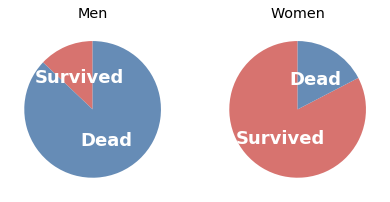

In [160]:
# （考察）

# ロジスティック回帰係数から，性別の影響が大きそう
data["Sex"] = data["Sex"].astype(int)
data["'Embarked"] = data["Embarked"].astype(int)
dfcorr = data.corr()
print(dfcorr)

import matplotlib.pyplot as plt
print(len(data[(data["Survived"]==1) & ( data["Sex"]==0) ]))

nSurvivedMen = len(data[(data["Survived"]==1) & ( data["Sex"]==0) ]) # 生存男性
nSurvivedWomen = len(data[(data["Survived"]==1) & ( data["Sex"]==1) ]) # 生存女性
nUnSurvivedMen = len(data[(data["Survived"]==0) & ( data["Sex"]==0) ]) # 非生存男性
nUnSurvivedWomen = len(data[(data["Survived"]==0) & ( data["Sex"]==1) ]) # 非生存女性

colors = ['#D7736F','#668CB6']
plt.style.use('ggplot')

plt.figure()

plt.subplot(1,2,1)
patches, texts = plt.pie([nSurvivedMen, nUnSurvivedMen], labels=["Survived", "Dead"], colors=colors,
                        startangle=90, labeldistance=0.5, textprops={'color': "white", 'weight': "bold"})
plt.title("Men")

for t in texts:
  t.set_horizontalalignment('center')
  t.set_size(18)

plt.subplot(1,2,2)
patches, texts = plt.pie([nSurvivedWomen, nUnSurvivedWomen], labels=["Survived", "Dead"], colors=colors,
                        startangle=90, labeldistance=0.5, textprops={'color': "white", 'weight': "bold"})
plt.title("Women")

for t in texts:
  t.set_horizontalalignment('center')
  t.set_size(18)
    
plt.savefig("survived_percentage.png")

In [126]:
# 線形重回帰分析では？
# そおそも出力が2値じゃないから意味がない？

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
#print(Y_pred)

print('accuracy = ', lr.score(X_test, Y_test))

accuracy =  0.6051857692409846
